[View in Colaboratory](https://colab.research.google.com/github/Sumindar/cnn/blob/master/mnistcnn.ipynb)

In [19]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7850080738297642049
]


In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import RMSprop
K.tensorflow_backend._get_available_gpus()


from matplotlib.pyplot import imshow
import numpy as np

batch_size = 128
num_classes = 10
epochs = 12



In [23]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [24]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape



(60000, 10)

In [25]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

In [27]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 435s 7ms/step - loss: 0.2619 - acc: 0.9199 - val_loss: 0.0700 - val_acc: 0.9782
Epoch 2/12
60000/60000 [==============================] - 433s 7ms/step - loss: 0.0912 - acc: 0.9731 - val_loss: 0.0411 - val_acc: 0.9864
Epoch 3/12
60000/60000 [==============================] - 436s 7ms/step - loss: 0.0662 - acc: 0.9803 - val_loss: 0.0376 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 432s 7ms/step - loss: 0.0547 - acc: 0.9838 - val_loss: 0.0320 - val_acc: 0.9889
Epoch 5/12
60000/60000 [==============================] - 441s 7ms/step - loss: 0.0476 - acc: 0.9855 - val_loss: 0.0334 - val_acc: 0.9877
Epoch 6/12
60000/60000 [==============================] - 446s 7ms/step - loss: 0.0426 - acc: 0.9871 - val_loss: 0.0284 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 456s 8ms/step - loss: 0.0376 - acc: 0.9883 - val_loss: 0.0282 - 

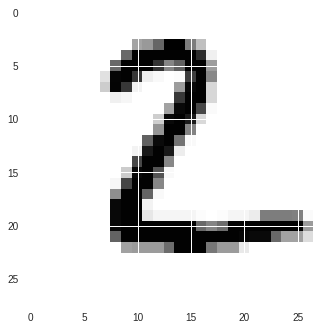

In [29]:
imshow(x_test[1].reshape(28,28))

In [30]:
np.where(y_test[1]==1)

(array([2]),)